
# ⚛️ Quantum Teleportation with Qiskit

This Jupyter Notebook demonstrates the **quantum teleportation protocol** — sending a qubit state using entanglement and classical bits.

---


# Teleportation

👩‍💻 Who is Alice? Who is Bob?

In quantum information, Alice and Bob are classic placeholders:<br>
Alice: the sender — she has the original quantum state she wants to send (teleport).<br>
Bob: the receiver — he wants to get an exact copy of Alice’s qubit without physically sending the qubit.

This convention comes from cryptography, where Alice and Bob are used to illustrate secure communication scenarios.

🧩 How does Quantum Teleportation work?

Quantum teleportation is not like Star Trek sci-fi teleportation — instead, it’s a protocol to transmit a quantum state from Alice to Bob using:

1. Entanglement

2. Classical communication

### import

In [ ]:
# 📚 Import Qiskit libraries
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit.visualization import plot_bloch_multivector

# Circuit Building

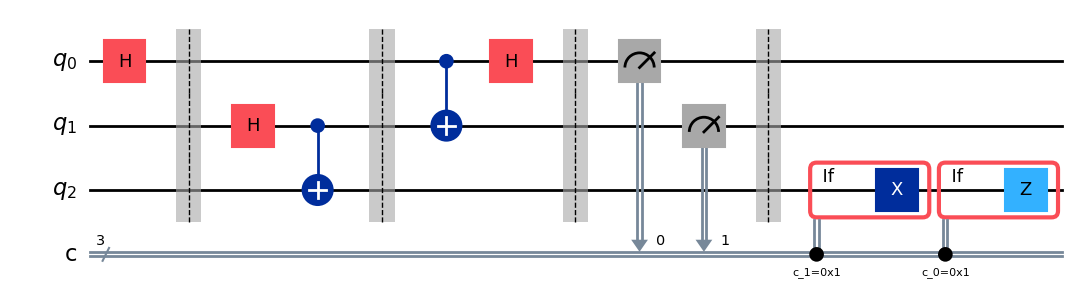

In [ ]:
# ⚙️ Create quantum circuit for teleportation
qc = QuantumCircuit(3,2)

# Apply Hadamard gate to create superposition
qc.h(0)
# Add barrier for visual separation
qc.barrier() #state 1 is |+>

qc.h(1)
# Apply CNOT gate to entangle qubits
qc.cx(1,2)
qc.barrier()

# Apply CNOT gate to entangle qubits
qc.cx(0,1)
# Apply Hadamard gate to create superposition
qc.h(0)
qc.barrier()

# Measure qubits to complete teleportation
qc.measure(0,0)
# Measure qubits to complete teleportation
qc.measure(1,1)
qc.barrier()

with qc.if_test((1 , 1)):
# Apply Pauli-X gate for preparation or correction
    qc.x(2)
with qc.if_test((0,1)):
# Apply Pauli-Z gate for correction
    qc.z(2)

qc.draw("mpl")

## Simulating and Verifying

Using statevector simulator...
Running statevector simulation...
Simulation successful.
Statevector retrieved successfully.

Visualizing final qubit states (q2 should match initial q0 state |+>):


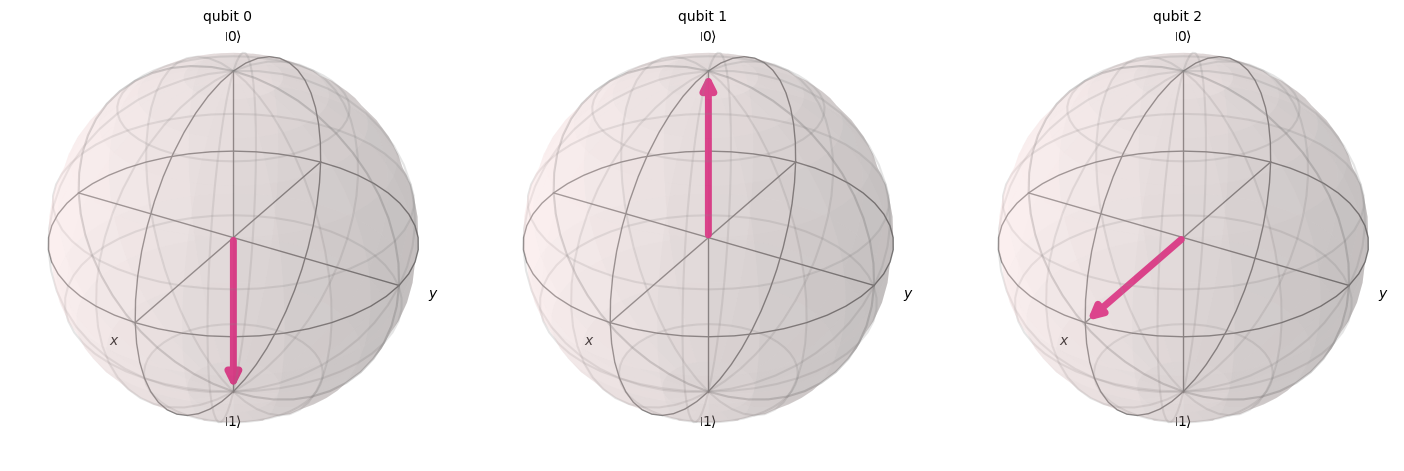

In [5]:
%matplotlib inline

# Use Statevector Simulator
print("Using statevector simulator...")
sv_simulator = AerSimulator(method='statevector') # Explicitly set method for clarity
teleport_qc_sv = qc.copy() # Work with a copy for statevector simulation
teleport_qc_sv.save_statevector() # Save statevector at the end

print("Running statevector simulation...")
job_sv = sv_simulator.run(teleport_qc_sv) # shots=1 is default for statevector
# Get results
result_sv = job_sv.result()

if result_sv.success:
    print("Simulation successful.")
# Get results
    final_statevector = result_sv.get_statevector()
    print("Statevector retrieved successfully.")
    print("\nVisualizing final qubit states (q2 should match initial q0 state |+>):")
    # q0 was |+> (points along +X). After teleportation, q2 should be |+>.
    # q0 and q1 states are after Alice's measurement, so they'll be collapsed.
    
    plot_bloch_multivector(final_statevector)
        
else:
    print(f"Statevector simulation failed! Status: {result_sv.status}")


## ✅ Conclusion

- We built the quantum teleportation protocol.
- Verified successful state transfer using entanglement and classical bits.

**Made with ❤️ using Qiskit**
